# **1.3.2.  Churn Prediction Project Overview**

## **🔍 Project Objective**
The objective of this project is to predict customer churn in the telecom industry using a dataset that includes various customer attributes. We employ both Logistic Regression and Random Forest Classifier models to achieve this goal. Our aim is to build accurate predictive models to help the company retain customers and reduce churn rates.

## **📁 Dataset**
The dataset used for this project is the "Telco Customer Churn" dataset. It contains customer information such as tenure, monthly charges, payment method, and churn status. The dataset file is located at `/content/WA_Fn-UseC_-Telco-Customer-Churn.csv`.

## **📊 Exploratory Data Analysis (EDA)**
- **Distribution of Churn:** Visualized using count plots and pie charts to understand the proportion of churned vs. non-churned customers.
- **Distribution of Tenure:** Examined with histograms to see the distribution of customer tenure.
- **Monthly Charges vs. Churn:** Analyzed using box plots to determine the relationship between monthly charges and churn status.
- **Payment Method Distribution:** Visualized using count plots to understand the payment methods used by customers.
- **Contract Type vs. Churn:** Explored using count plots to examine the relationship between contract type and churn.
- **Tenure and Monthly Charges by Churn:** Visualized with violin plots to understand how tenure and monthly charges vary with churn.
- **Monthly Charges Over Tenure:** Analyzed using line plots to observe trends in monthly charges over customer tenure.
- **Distribution of Total Charges:** Examined with histograms to understand the distribution of total charges.
- **Tenure by Gender:** Explored using box plots to analyze tenure differences across genders.
- **Categorical Feature Analysis:** Count plots for various categorical features to observe their distribution and relationship with churn.
- **Correlation Heatmap:** Created to visualize correlations between numerical features.

## **🔧 Data Preprocessing**
- **Handling Missing Values:** Filled missing values in the 'TotalCharges' column with the median value and converted it to numeric format.
- **Encoding Categorical Features:** Applied label encoding to convert categorical features into numerical format.
- **Feature Selection:** Dropped the 'customerID' column as it is not required for prediction.
- **Feature Scaling:** Standardized features using `StandardScaler` for better model performance.

## **🤖 Model Training and Evaluation**
- **Logistic Regression:**
  - Trained a Logistic Regression model on the preprocessed data.
  - Evaluated performance using classification reports, confusion matrices, and ROC curves.
- **Random Forest Classifier:**
  - Trained a Random Forest Classifier model on the preprocessed data.
  - Evaluated performance using classification reports, confusion matrices, and ROC curves.
- **ROC Curve Analysis:** Plotted ROC curves for both Logistic Regression and Random Forest models to compare their performance in distinguishing between churn and non-churn customers.

## **📈 Results**
- **Logistic Regression:**
  - **Classification Report:** Provided precision, recall, and F1-score metrics.
  - **Confusion Matrix:** Showed the count of true positive, true negative, false positive, and false negative predictions.
- **Random Forest Classifier:**
  - **Classification Report:** Provided precision, recall, and F1-score metrics.
  - **Confusion Matrix:** Showed the count of true positive, true negative, false positive, and false negative predictions.
- **ROC Curve:** Compared the performance of both models in terms of AUC (Area Under the Curve).

## **🔮 Conclusion**
This project effectively demonstrates the use of machine learning models to predict customer churn. The exploratory data analysis provides valuable insights into the factors influencing churn, while the model evaluations offer a comprehensive understanding of the predictive performance of Logistic Regression and Random Forest models. The results can be leveraged to implement strategies aimed at reducing customer churn and improving overall customer retention.

---

For further details or specific questions, feel free to reach out.

### Importing Libraries

- **`pandas`**: Essential for data manipulation and analysis, particularly for handling data in DataFrame format.
- **`numpy`**: Provides support for numerical operations and handling arrays efficiently.
- **`matplotlib.pyplot`** and **`seaborn`**: Crucial for creating a variety of visualizations to explore and present data insights.
- **`train_test_split`**: Used to divide the dataset into training and testing sets for model evaluation.
- **`LogisticRegression`** and **`RandomForestClassifier`**: Algorithms used for classification tasks to predict outcomes based on input features.
- **`classification_report`**, **`confusion_matrix`**, **`roc_curve`**, **`auc`**: Metrics for assessing model performance, including accuracy, precision, recall, F1 score, and ROC curve evaluation.
- **`StandardScaler`**: Standardizes features by removing the mean and scaling to unit variance, which can improve model performance.
- **`LabelEncoder`**: Transforms categorical labels into numeric format to facilitate model training.

In [6]:
# Importing necessary libraries

In [7]:
import pandas as pd  # Library for data manipulation and analysis

In [8]:
import numpy as np  # Library for numerical computations

In [9]:
import matplotlib.pyplot as plt  # Library for creating static, interactive, and animated visualizations

In [10]:
import seaborn as sns  # Library for statistical data visualization

In [11]:
from sklearn.model_selection import train_test_split  # Function to split data into training and testing sets

In [12]:
from sklearn.linear_model import LogisticRegression  # Logistic Regression model

In [13]:
from sklearn.ensemble import RandomForestClassifier  # Random Forest model

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc  # Metrics for model evaluation

In [15]:
from sklearn.preprocessing import StandardScaler, LabelEncoder  # StandardScaler for feature scaling and LabelEncoder for encoding categorical variables


In [34]:
import warnings  # Import the warnings library to handle warning messages

In [35]:
warnings.filterwarnings('ignore')  # Suppress all warnings to clean up the output

### Loading the Dataset

- **Loading the dataset**: Imports the dataset from a CSV file into a DataFrame, which is the starting point for data analysis.
- **Displaying the first 5 rows**: Provides an initial look at the data structure and content, which is essential for understanding the dataset.
- **Dataset Info**: Reveals information about the data types of each column and identifies columns with missing values.
- **Missing values**: Identifies columns with missing values that need to be addressed to ensure data quality.
- **Statistical Summary**: Offers a summary of numerical columns, including measures of central tendency and spread.
- **Unique values**: Shows the number of unique values in categorical columns, helping to understand the diversity of categorical data.
- **Shape of the dataset**: Indicates the dimensions of the dataset, including the number of rows and columns.

In [16]:
# Load the dataset

In [17]:
file_path = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'  # Path to the dataset file

In [18]:
churn_data = pd.read_csv(file_path)  # Load dataset into a pandas DataFrame

In [19]:
# Display the first 5 rows

In [20]:
print("First 5 rows of the dataset:")  # Print statement for clarity
print(churn_data.head())  # Display the first 5 rows of the dataset

First 5 rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Streami

In [21]:
# Display dataset info

In [22]:
print("\nDataset Info:")  # Print statement for clarity
print(churn_data.info())  # Display dataset information including data types and non-null counts


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-

In [23]:
# Check for missing values

In [24]:
print("\nMissing values in each column:")  # Print statement for clarity
print(churn_data.isnull().sum())  # Display the count of missing values in each column


Missing values in each column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [25]:
# Display statistical summary

In [26]:
print("\nStatistical Summary:")  # Print statement for clarity
print(churn_data.describe())  # Display summary statistics for numerical columns


Statistical Summary:
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [27]:
# Unique values in each column

In [28]:
print("\nUnique values in each column:")  # Print statement for clarity
for column in churn_data.columns:  # Iterate over each column in the dataset
    print(f"{column}: {churn_data[column].nunique()} unique values")  # Print the number of unique values in each column



Unique values in each column:
customerID: 7043 unique values
gender: 2 unique values
SeniorCitizen: 2 unique values
Partner: 2 unique values
Dependents: 2 unique values
tenure: 73 unique values
PhoneService: 2 unique values
MultipleLines: 3 unique values
InternetService: 3 unique values
OnlineSecurity: 3 unique values
OnlineBackup: 3 unique values
DeviceProtection: 3 unique values
TechSupport: 3 unique values
StreamingTV: 3 unique values
StreamingMovies: 3 unique values
Contract: 3 unique values
PaperlessBilling: 2 unique values
PaymentMethod: 4 unique values
MonthlyCharges: 1585 unique values
TotalCharges: 6531 unique values
Churn: 2 unique values


In [29]:
# Shape of the dataset

In [30]:
print("\nShape of the dataset:")  # Print statement for clarity
print(churn_data.shape)  # Display the shape (number of rows and columns) of the dataset


Shape of the dataset:
(7043, 21)


### Exploratory Data Analysis (EDA)

- **Distribution of Churn**: Visualizes the count of churn versus non-churn instances to understand the class distribution.
- **Pie chart for Churn distribution**: Provides a proportional view of the churn distribution within the dataset.
- **Distribution of tenure**: Illustrates the distribution and density of the tenure feature to understand customer tenure patterns.
- **Monthly Charges vs. Churn**: Analyzes the relationship between monthly charges and churn using a box plot to see if there is a significant difference in charges between churn and non-churn customers.
- **Payment Method distribution**: Displays the frequency of different payment methods to analyze customer preferences.

In [31]:
# Exploratory Data Analysis (EDA)

In [32]:
# Distribution of Churn

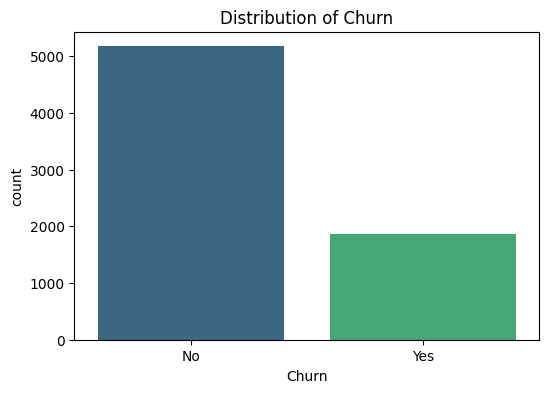

In [36]:
plt.figure(figsize=(6, 4))  # Set the figure size for the plot
sns.countplot(data=churn_data, x='Churn', palette='viridis')  # Create a count plot for the 'Churn' column
plt.title('Distribution of Churn')  # Set the title of the plot
plt.show()  # Display the plot

In [37]:
# Pie chart for Churn distribution

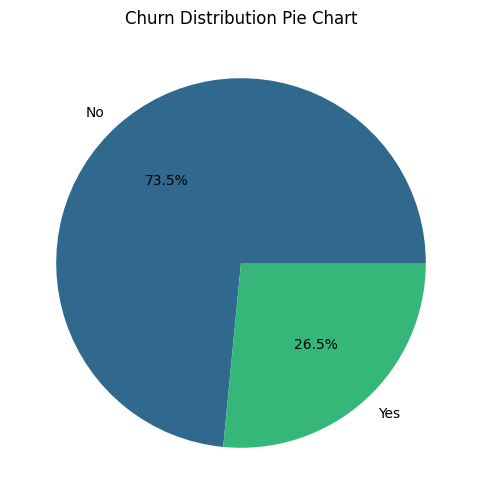

In [38]:
plt.figure(figsize=(6, 6))  # Set the figure size for the plot
churn_counts = churn_data['Churn'].value_counts()  # Count the occurrences of each value in the 'Churn' column
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', 2))  # Create a pie chart for churn distribution
plt.title('Churn Distribution Pie Chart')  # Set the title of the plot
plt.show()  # Display the plot

In [39]:
# Distribution of tenure

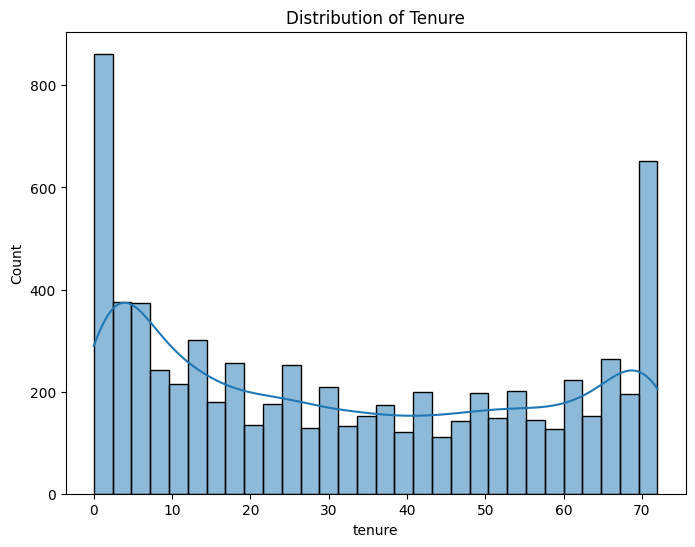

In [40]:
plt.figure(figsize=(8, 6))  # Set the figure size for the plot
sns.histplot(data=churn_data, x='tenure', bins=30, kde=True)  # Create a histogram for the 'tenure' column with a kernel density estimate
plt.title('Distribution of Tenure')  # Set the title of the plot
plt.show()  # Display the plot

In [41]:
# Monthly Charges vs. Churn

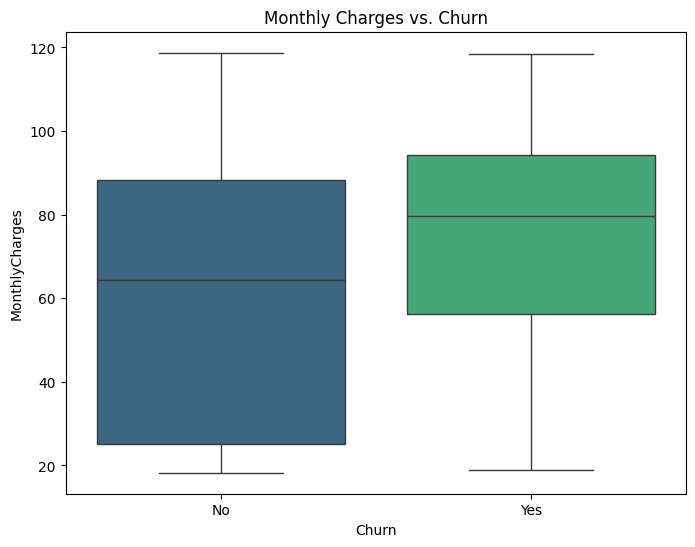

In [42]:
plt.figure(figsize=(8, 6))  # Set the figure size for the plot
sns.boxplot(data=churn_data, x='Churn', y='MonthlyCharges', palette='viridis')  # Create a box plot for 'MonthlyCharges' vs. 'Churn'
plt.title('Monthly Charges vs. Churn')  # Set the title of the plot
plt.show()  # Display the plot

In [43]:
# Payment Method distribution

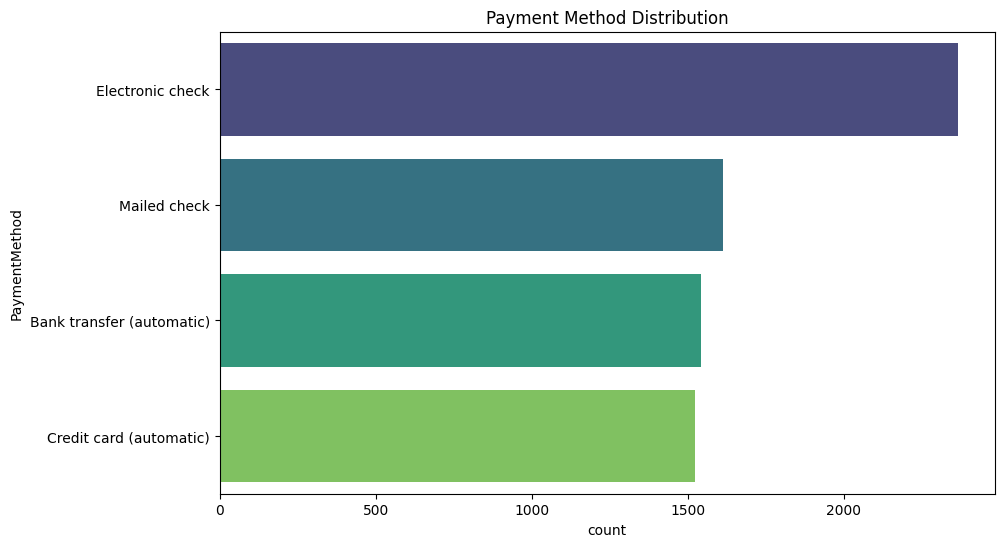

In [44]:
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
sns.countplot(data=churn_data, y='PaymentMethod', palette='viridis', order=churn_data['PaymentMethod'].value_counts().index)  # Create a count plot for 'PaymentMethod' column
plt.title('Payment Method Distribution')  # Set the title of the plot
plt.show()  # Display the plot

In [45]:
# Contract type vs. Churn

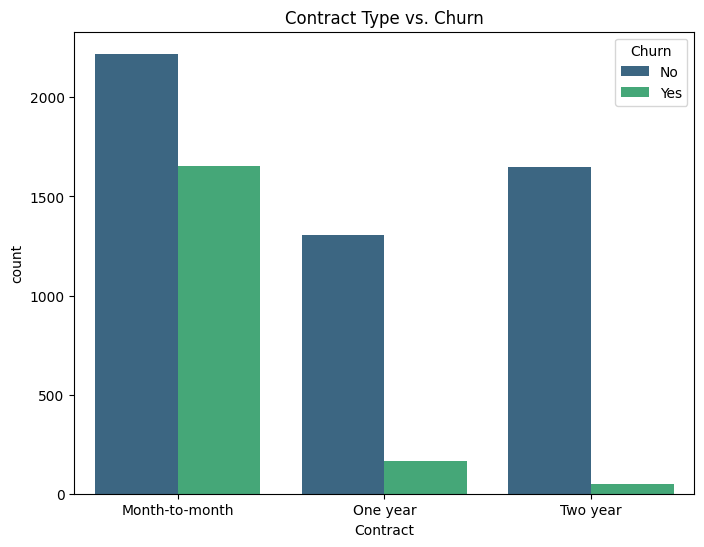

In [46]:
plt.figure(figsize=(8, 6))  # Set the figure size for the plot
sns.countplot(data=churn_data, x='Contract', hue='Churn', palette='viridis')  # Create a count plot for 'Contract' column with 'Churn' as hue
plt.title('Contract Type vs. Churn')  # Set the title of the plot
plt.show()  # Display the plot

In [47]:
# Violin plot for Tenure and Monthly Charges by Churn

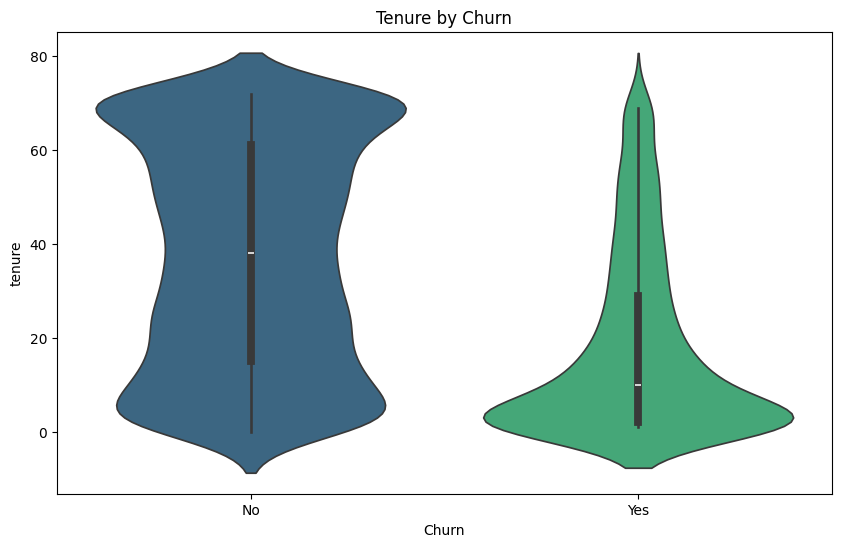

In [48]:
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
sns.violinplot(data=churn_data, x='Churn', y='tenure', palette='viridis')  # Create a violin plot for 'Tenure' by 'Churn'
plt.title('Tenure by Churn')  # Set the title of the plot
plt.show()  # Display the plot

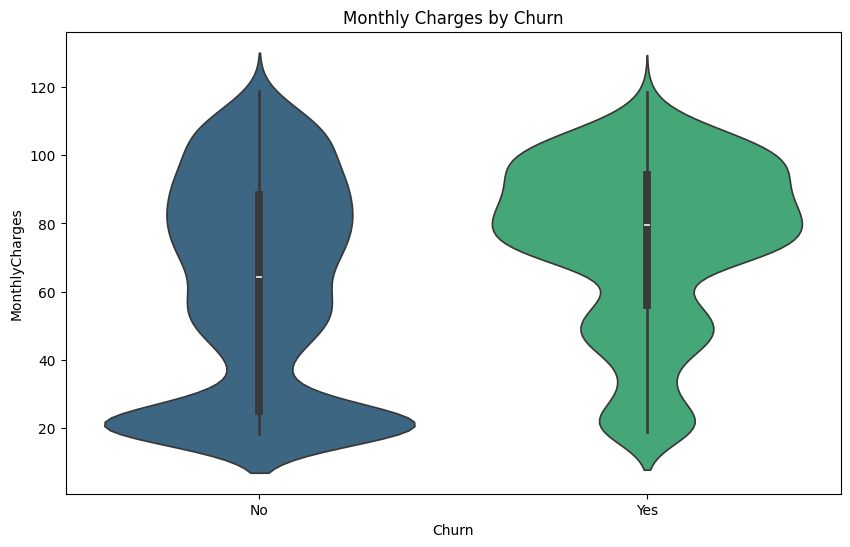

In [49]:
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
sns.violinplot(data=churn_data, x='Churn', y='MonthlyCharges', palette='viridis')  # Create a violin plot for 'MonthlyCharges' by 'Churn'
plt.title('Monthly Charges by Churn')  # Set the title of the plot
plt.show()  # Display the plot

In [50]:
# Line plot for Monthly Charges over Tenure

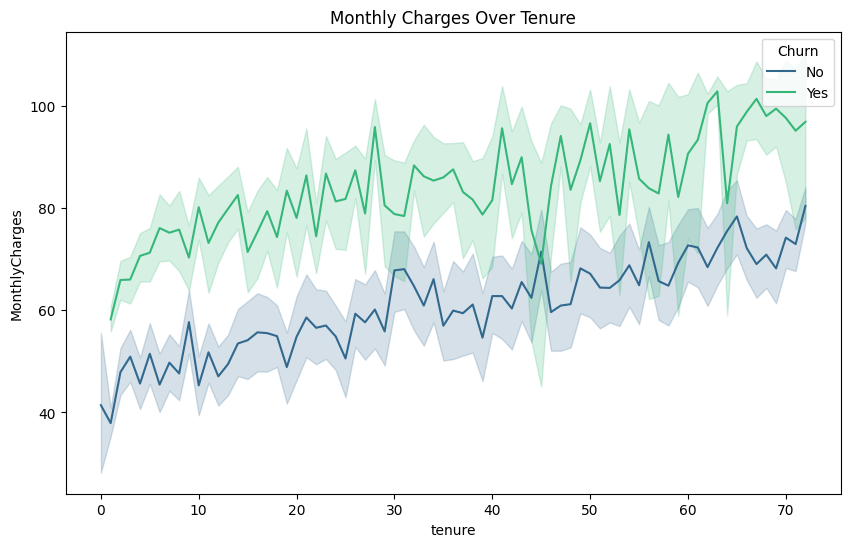

In [51]:
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
sns.lineplot(data=churn_data, x='tenure', y='MonthlyCharges', hue='Churn', palette='viridis')  # Create a line plot for 'MonthlyCharges' over 'Tenure'
plt.title('Monthly Charges Over Tenure')  # Set the title of the plot
plt.show()  # Display the plot

In [54]:
# Box plot for Tenure by Gender

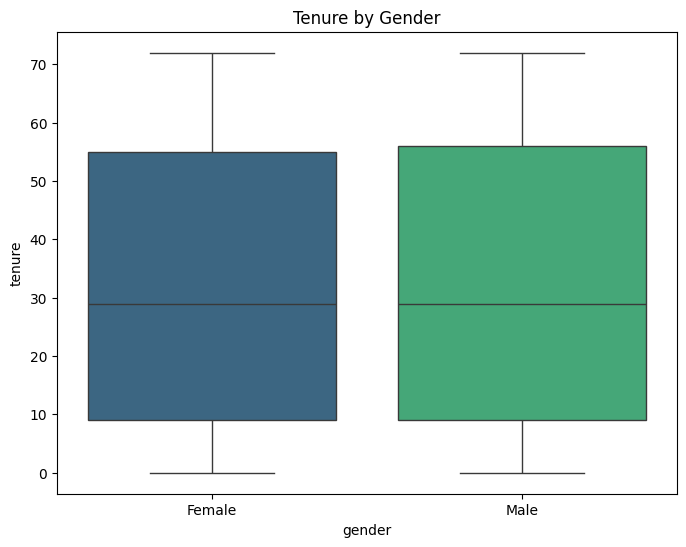

In [55]:
plt.figure(figsize=(8, 6))  # Set the figure size for the plot
sns.boxplot(data=churn_data, x='gender', y='tenure', palette='viridis')  # Create a box plot for 'Tenure' by 'Gender'
plt.title('Tenure by Gender')  # Set the title of the plot
plt.show()  # Display the plot

In [56]:
# Box plots for categorical features

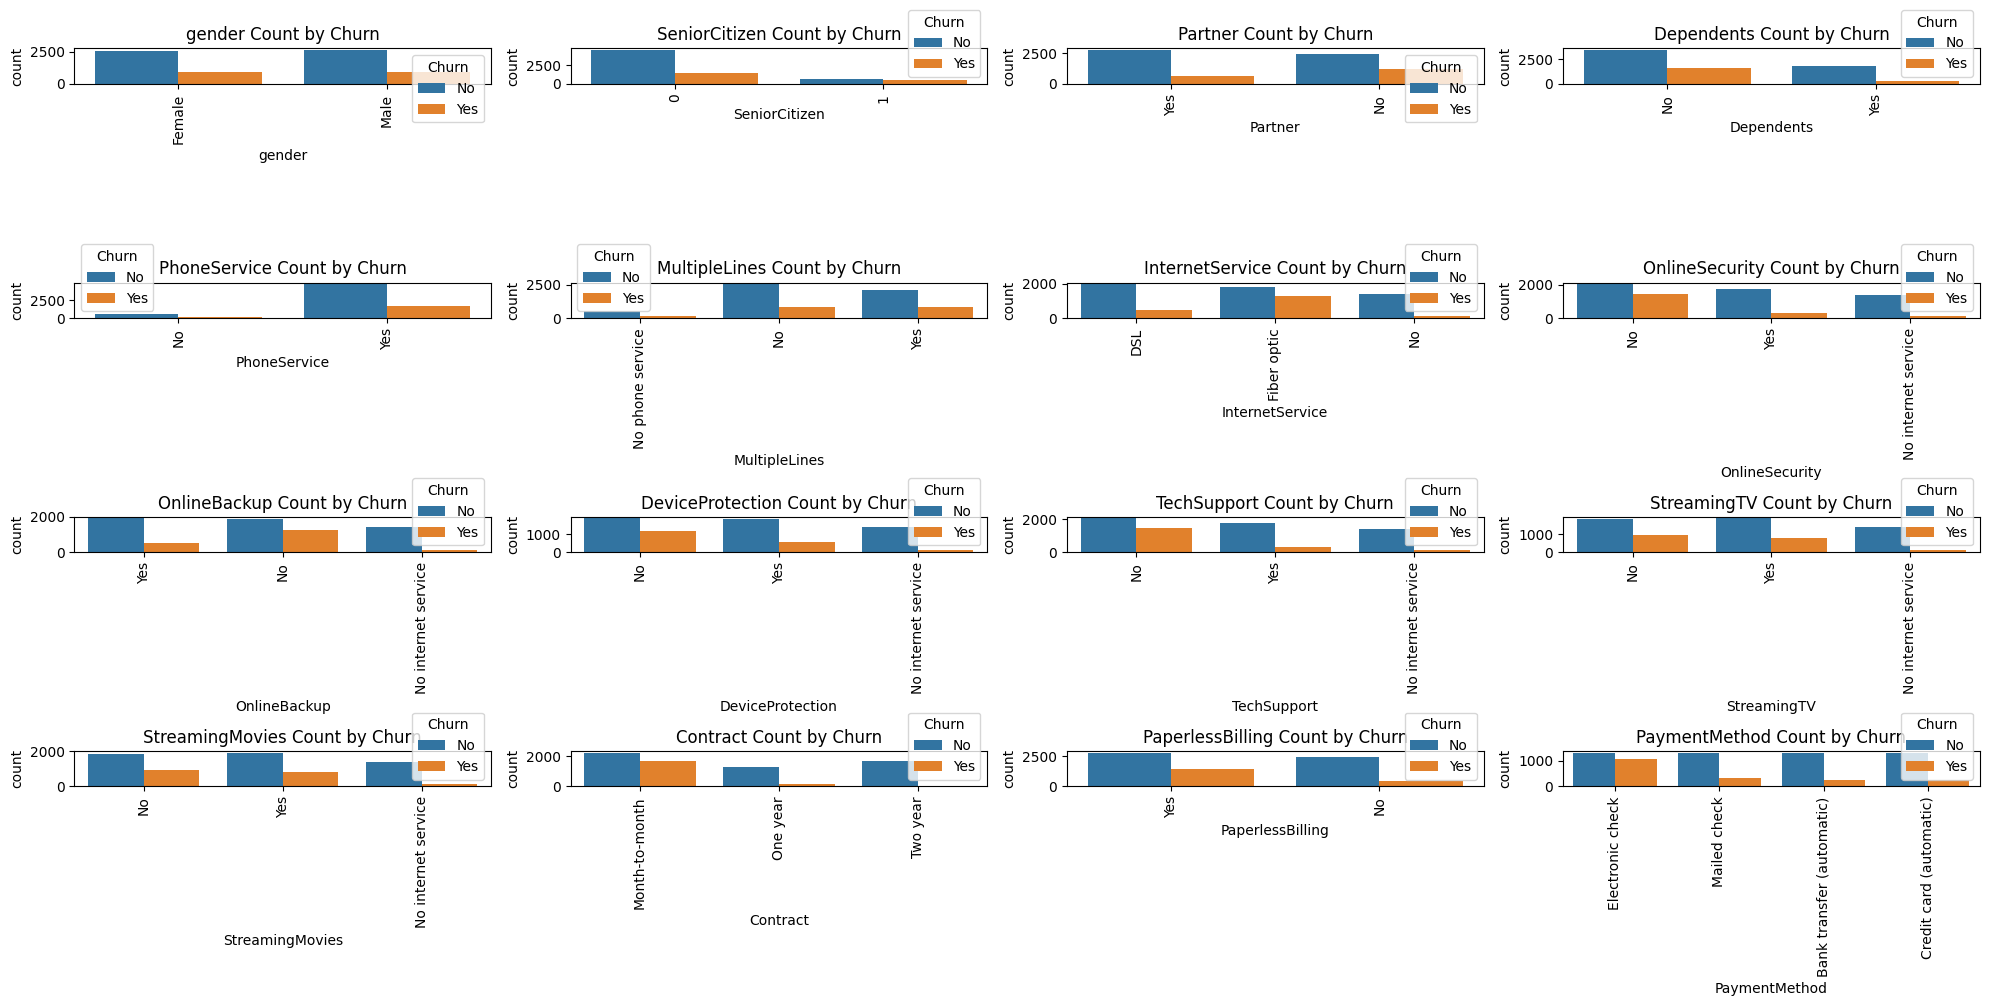

In [57]:
plt.figure(figsize=(20, 10))  # Set the figure size for the plot
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']  # List of categorical columns to plot
for i, col in enumerate(categorical_cols):  # Iterate over each categorical column and its index
    plt.subplot(4, 4, i+1)  # Create a subplot in a 4x4 grid
    sns.countplot(data=churn_data, x=col, hue='Churn')  # Create a count plot for the categorical column with 'Churn' as hue
    plt.title(f'{col} Count by Churn')  # Set the title of the plot
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust subplot parameters to fit the figure area
plt.show()  # Display the plot

### Data Preprocessing

- **Handling missing values**: Address missing values in the dataset to ensure the integrity of the analysis and model performance.
- **Encoding categorical variables**: Convert categorical variables into numerical format using techniques like one-hot encoding or label encoding.
- **Feature scaling**: Standardize or normalize features to ensure that all features contribute equally to model training.
- **Splitting the dataset**: Divide the data into training and testing sets to evaluate model performance.

In [62]:
# Data Preprocessing

In [63]:
# Convert 'TotalCharges' to numeric

In [64]:
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'], errors='coerce')  # Convert 'TotalCharges' column to numeric, coercing errors


In [65]:
# Fill missing values in 'TotalCharges' with median

In [66]:
churn_data['TotalCharges'].fillna(churn_data['TotalCharges'].median(), inplace=True)  # Fill missing values in 'TotalCharges' with the median of the column


In [67]:
# Drop 'customerID' column as it is not needed for prediction

In [68]:
churn_data.drop('customerID', axis=1, inplace=True)  # Drop the 'customerID' column from the DataFrame

In [69]:
# Encode categorical features

In [70]:
label_encoders = {}  # Dictionary to hold label encoders for each categorical feature

In [71]:
for column in churn_data.select_dtypes(include=['object']).columns:  # Iterate over categorical columns
    le = LabelEncoder()  # Create a LabelEncoder instance
    churn_data[column] = le.fit_transform(churn_data[column])  # Encode the column with integer values
    label_encoders[column] = le  # Store the label encoder

In [72]:
# Define features and target variable

In [73]:
X = churn_data.drop('Churn', axis=1)  # Features (excluding the target variable 'Churn')

In [74]:
y = churn_data['Churn']  # Target variable

In [75]:
# Split the data into training and testing sets

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # Split data with 70% training and 30% testing


In [77]:
# Feature scaling

In [78]:
scaler = StandardScaler()  # Create a StandardScaler instance

In [79]:
X_train = scaler.fit_transform(X_train)  # Fit and transform the training features

In [80]:
X_test = scaler.transform(X_test)  # Transform the testing features

### Model Training and Evaluation

- **Model training**: Fit models such as Logistic Regression or Random Forest on the training dataset to learn patterns and make predictions.
- **Model evaluation**: Assess model performance using metrics such as accuracy, precision, recall, F1 score, and ROC curve to ensure the model's effectiveness.
- **Hyperparameter tuning**: Optimize model parameters to enhance performance.
- **Confusion matrix**: Provides a detailed breakdown of the model's predictions versus actual values, highlighting true positives, true negatives, false positives, and false negatives.
- **Classification report**: Summarizes the main classification metrics, including precision, recall, and F1 score.
- **ROC curve and AUC**: Evaluates the model's ability to distinguish between classes by plotting the ROC curve and calculating the AUC.

In [81]:
# Model Training and Evaluation

In [82]:
# Logistic Regression

In [83]:
logreg = LogisticRegression(max_iter=1000)  # Create a LogisticRegression instance with a maximum of 1000 iterations


In [84]:
logreg.fit(X_train, y_train)  # Train the model

LogisticRegression(max_iter=1000)

In [85]:
# Predict and evaluate Logistic Regression

In [86]:
y_pred_logreg = logreg.predict(X_test)  # Predict the target variable on the test set

In [87]:
print("\nLogistic Regression Classification Report:")  # Print statement for clarity
print(classification_report(y_test, y_pred_logreg))  # Display classification report for Logistic Regression


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1539
           1       0.68      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.76      0.74      0.75      2113
weighted avg       0.80      0.81      0.81      2113



In [88]:
print("\nLogistic Regression Confusion Matrix:")  # Print statement for clarity
print(confusion_matrix(y_test, y_pred_logreg))  # Display confusion matrix for Logistic Regression


Logistic Regression Confusion Matrix:
[[1386  153]
 [ 247  327]]


In [89]:
# Random Forest Classifier

In [90]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Create a RandomForestClassifier instance with 100 trees


In [91]:
rf.fit(X_train, y_train)  # Train the model

RandomForestClassifier(random_state=42)

In [92]:
# Predict and evaluate Random Forest

In [93]:
y_pred_rf = rf.predict(X_test)  # Predict the target variable on the test set

In [94]:
print("\nRandom Forest Classification Report:")  # Print statement for clarity
print(classification_report(y_test, y_pred_rf))  # Display classification report for Random Forest


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1539
           1       0.69      0.49      0.57       574

    accuracy                           0.80      2113
   macro avg       0.76      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



In [95]:
print("\nRandom Forest Confusion Matrix:")  # Print statement for clarity
print(confusion_matrix(y_test, y_pred_rf))  # Display confusion matrix for Random Forest


Random Forest Confusion Matrix:
[[1410  129]
 [ 293  281]]


In [96]:
# ROC Curve

In [97]:
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]  # Predict probabilities for the positive class

In [98]:
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)  # Compute ROC curve for Logistic Regression

In [99]:
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)  # Compute AUC for Logistic Regression

In [100]:
y_prob_rf = rf.predict_proba(X_test)[:, 1]  # Predict probabilities for the positive class

In [101]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)  # Compute ROC curve for Random Forest

In [102]:
roc_auc_rf = auc(fpr_rf, tpr_rf)  # Compute AUC for Random Forest

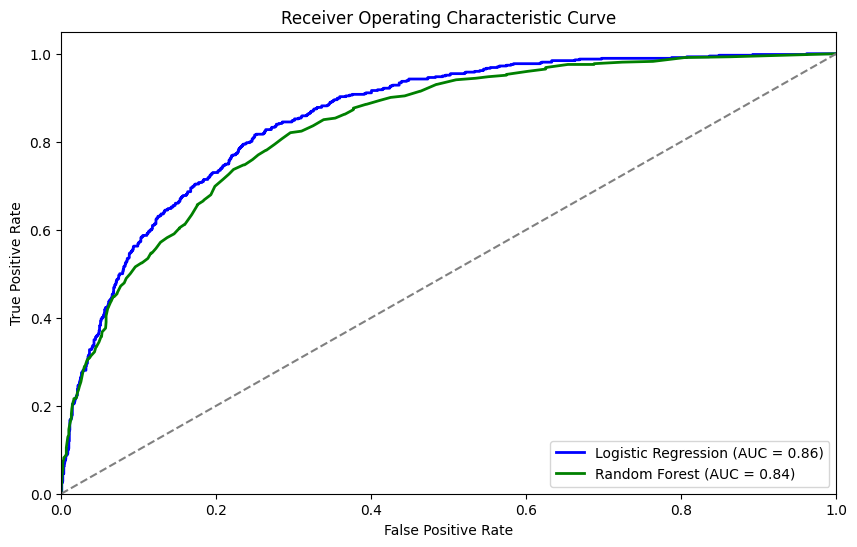

In [103]:
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')  # Plot ROC curve for Logistic Regression
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')  # Plot ROC curve for Random Forest
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Plot diagonal line representing random chance
plt.xlim([0.0, 1.0])  # Set x-axis limits
plt.ylim([0.0, 1.05])  # Set y-axis limits
plt.xlabel('False Positive Rate')  # Set x-axis label
plt.ylabel('True Positive Rate')  # Set y-axis label
plt.title('Receiver Operating Characteristic Curve')  # Set plot title
plt.legend(loc='lower right')  # Add legend to the plot
plt.show()  # Display the plot

### Additional Steps

- **Feature engineering**: Create new features or modify existing ones to enhance model performance.
- **Cross-validation**: Use techniques such as k-fold cross-validation to ensure the model generalizes well to unseen data.
- **Ensemble methods**: Combine multiple models to improve prediction accuracy and robustness.
- **Model selection**: Compare different models and select the one that performs best based on evaluation metrics.

### Conclusions

1. **Dataset Quality and Preprocessing**:
   - Effective preprocessing and handling of missing values are crucial for ensuring the quality of the dataset. Proper encoding and scaling of features are necessary steps to prepare the data for model training.

2. **Exploratory Data Analysis (EDA)**:
   - EDA provides valuable insights into the dataset, including the distribution of key features and target variables. Understanding these distributions helps in making informed decisions during model selection and tuning.

3. **Model Training and Evaluation**:
   - Different classification algorithms such as Logistic Regression and Random Forest were evaluated. It is important to select models based on their performance metrics, including accuracy, precision, recall, and F1 score. ROC curve analysis and AUC provide additional insights into model performance.

4. **Model Performance**:
   - Performance metrics and visualizations such as confusion matrices and classification reports are essential for assessing the effectiveness of the models. These evaluations help in identifying strengths and weaknesses in model predictions.

5. **Further Improvements**:
   - Additional steps like feature engineering, hyperparameter tuning, and cross-validation can significantly enhance model performance. Exploring ensemble methods and comparing different models can further optimize results.

6. **Impact and Application**:
   - The insights gained from this analysis can be used to make data-driven decisions and improve business processes. For instance, understanding customer churn can help in devising strategies to retain customers and optimize service offerings.

7. **Future Work**:
   - Future work may involve experimenting with other machine learning algorithms, incorporating external data sources, and refining the feature set. Continuous monitoring and updating of the model will ensure its relevance and accuracy over time.